# Stratification v2

In [1]:
import sys

sys.path.append("../")

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from utils.bootstrap import bootstrap_experiment
from utils.prop_utils import prop_probs
from utils.strat_utils import calculate_stratified_effects

In [3]:
lalonde_exp = pd.read_csv("../data/lalonde_exp.csv")
lalonde_obs = pd.read_csv("../data/lalonde_psid.csv")

In [4]:
lalonde_exp["re78_re75"] = lalonde_exp["re78"] - lalonde_exp["re75"]
lalonde_obs["re78_re75"] = lalonde_obs["re78"] - lalonde_obs["re75"]

We're using a difference of differences in revenues in 1978 and 1975:

$\beta_{k} = E[(Re_{78} - Re_{75})^{a=1}_k - (Re_{78} - Re_{75})^{a=0}_k]$

## Experimental Data

In [5]:
propensity_probabilities = prop_probs(
    lalonde_exp,
    "treat",
    ["age", "education", "black", "hispanic", "married", "re74", "re75"],
)
lalonde_exp = pd.merge(lalonde_exp, propensity_probabilities, on="id")

In [6]:
bootstrap_results = {}
num_strata_values = range(1, 35, 3)

for num_strata in num_strata_values:
    bootstrap_results[num_strata] = bootstrap_experiment(
        lalonde_exp,
        calculate_stratified_effects,
        num_exp=1,
        n=50,
        ci=95,
        prop_col="propensity",
        treatment_col="treat",
        outcome_col="re78_re75",
        num_strata=num_strata,
    )

Running experiments: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.32it/s]


In [7]:
data = []
for num_strata, ci_array in bootstrap_results.items():
    mean = ci_array[0, 0]
    lower = ci_array[0, 1]
    upper = ci_array[0, 2]
    data.append([num_strata, mean, lower, upper])

ci_df = pd.DataFrame(data, columns=["num_strata", "mean", "lower_ci", "upper_ci"])

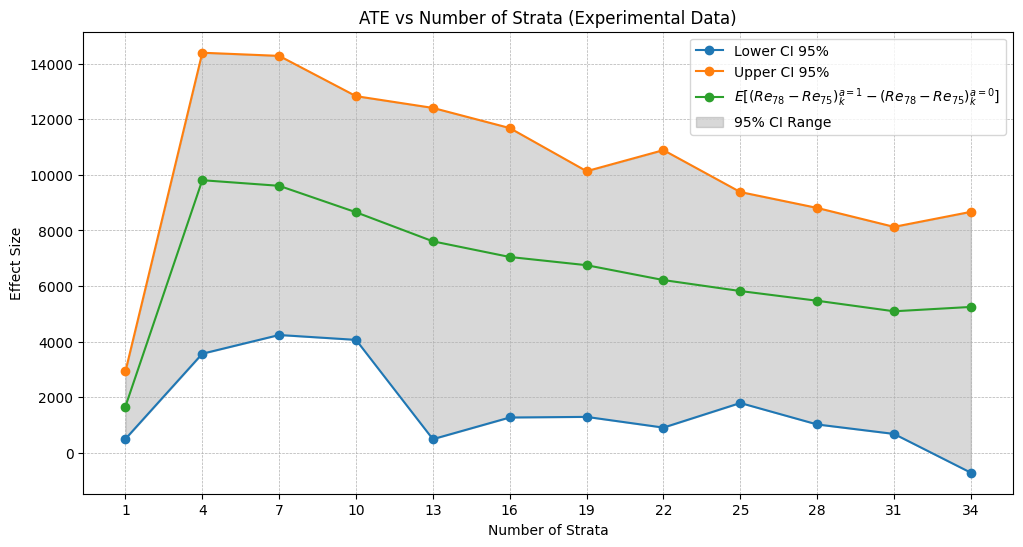

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(ci_df["num_strata"], ci_df["lower_ci"], label="Lower CI 95%", marker="o")
plt.plot(ci_df["num_strata"], ci_df["upper_ci"], label="Upper CI 95%", marker="o")
plt.plot(
    ci_df["num_strata"],
    ci_df["mean"],
    label="$E[(Re_{78} - Re_{75})^{a=1}_k - (Re_{78} - Re_{75})^{a=0}_k]$",
    marker="o",
)

plt.fill_between(
    ci_df["num_strata"],
    ci_df["lower_ci"],
    ci_df["upper_ci"],
    color="gray",
    alpha=0.3,
    label="95% CI Range",
)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.xticks(ci_df["num_strata"])
plt.xlabel("Number of Strata")
plt.ylabel("Effect Size")
plt.title("ATE vs Number of Strata (Experimental Data)")
plt.legend()
plt.show()

In [9]:
ci_df

,num_strata,mean,lower_ci,upper_ci
0,1,1662.493679,495.309716,2924.839811
1,4,9808.553039,3562.910082,14397.509670
2,7,9606.973817,4236.941037,14284.017234
3,10,8654.780050,4061.433985,12834.483983
4,13,7609.056461,486.946626,12411.287354
5,16,7045.368362,1267.386003,11686.243702
6,19,6749.604878,1289.419196,10133.388442
7,22,6214.185757,903.381777,10891.722490
8,25,5819.201776,1789.129070,9382.789057
9,28,5469.947512,1016.878640,8811.230562


## Observational Data

In [10]:
propensity_probabilities = prop_probs(
    lalonde_obs,
    "treat",
    ["age", "education", "black", "hispanic", "married", "re74", "re75"],
)
lalonde_obs = pd.merge(lalonde_obs, propensity_probabilities, on="id")

In [11]:
bootstrap_results = {}
num_strata_values = range(1, 35, 3)

for num_strata in num_strata_values:
    bootstrap_results[num_strata] = bootstrap_experiment(
        lalonde_obs,
        calculate_stratified_effects,
        num_exp=1,
        n=50,
        ci=95,
        prop_col="propensity",
        treatment_col="treat",
        outcome_col="re78_re75",
        num_strata=num_strata,
    )

Running experiments: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.21it/s]


In [12]:
data = []
for num_strata, ci_array in bootstrap_results.items():
    mean = ci_array[0, 0]
    lower = ci_array[0, 1]
    upper = ci_array[0, 2]
    data.append([num_strata, mean, lower, upper])

ci_df = pd.DataFrame(data, columns=["num_strata", "mean", "lower_ci", "upper_ci"])

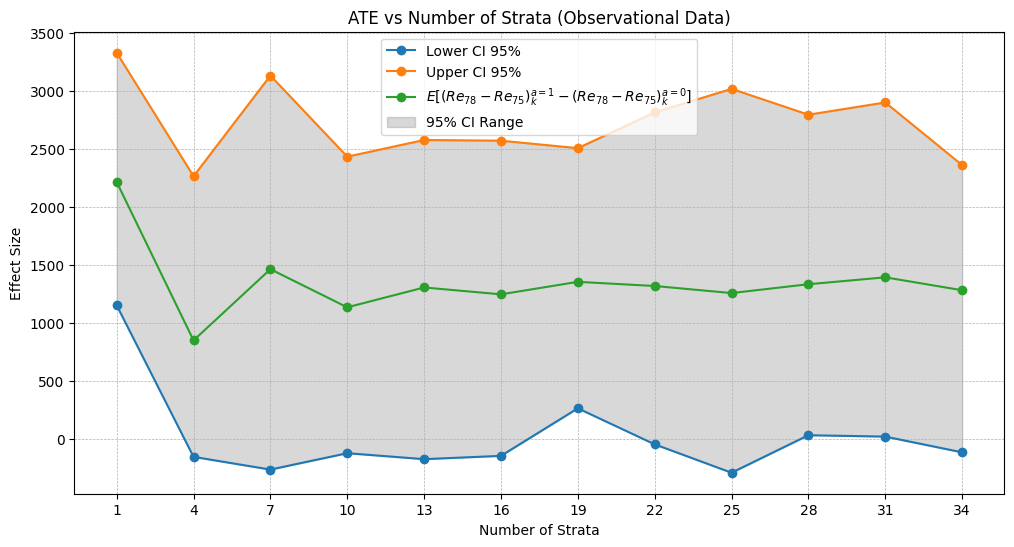

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(ci_df["num_strata"], ci_df["lower_ci"], label="Lower CI 95%", marker="o")
plt.plot(ci_df["num_strata"], ci_df["upper_ci"], label="Upper CI 95%", marker="o")
plt.plot(
    ci_df["num_strata"],
    ci_df["mean"],
    label="$E[(Re_{78} - Re_{75})^{a=1}_k - (Re_{78} - Re_{75})^{a=0}_k]$",
    marker="o",
)

plt.fill_between(
    ci_df["num_strata"],
    ci_df["lower_ci"],
    ci_df["upper_ci"],
    color="gray",
    alpha=0.3,
    label="95% CI Range",
)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.xticks(ci_df["num_strata"])
plt.xlabel("Number of Strata")
plt.ylabel("Effect Size")
plt.title("ATE vs Number of Strata (Observational Data)")
plt.legend()
plt.show()

In [14]:
ci_df

,num_strata,mean,lower_ci,upper_ci
0,1,2214.787345,1152.278525,3328.433914
1,4,850.366893,-152.962111,2264.778828
2,7,1463.664939,-262.533426,3131.626946
3,10,1135.291259,-121.400297,2433.106201
4,13,1306.258602,-172.708850,2576.834115
5,16,1247.066676,-144.241401,2570.653489
6,19,1354.747220,265.197529,2506.390933
7,22,1318.944669,-45.081012,2814.585740
8,25,1258.087507,-289.561874,3017.029450
9,28,1334.159761,33.427157,2794.733378


We can see that 7 stratas are a low number of strats but also sufficient to be less biased and have a sufficiently low variance.

In [15]:
ci = bootstrap_experiment(
    lalonde_obs,
    calculate_stratified_effects,
    num_exp=1,
    n=50,
    ci=95,
    prop_col="propensity",
    treatment_col="treat",
    outcome_col="re78_re75",
    num_strata=7,
)

Running experiments: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.07it/s]


In [16]:
print(
    f"Causal estimate of `Re78` - `Re75` in Observable data as a difference of means is "
    f"US${ci[0][0]:.2f} ± [{ci[0][1]:.2f}, {ci[0][2]:.2f}]"
)

Causal estimate of `Re78` - `Re75` in Observable data as a difference of means is US$1122.41 ± [-143.70, 2300.95]
